# Buyer-Intent Optimal Questionnaire Performance Robustness
### The Following Definition is used as the best staging methodology
---
![title](img/best_labeling.jpg)

In [1]:
import ml_sagemaker_helper as sm_helper
import pickle
import os

## Clean up locations for Sagemaker
#### This is needed to make sure the folders related to train and test data are clean for model training for each 3 labels

In [2]:
#Clean up the prevoius location used by last automl to upload fresh train and test files
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/train/')
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/test/')
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/output/')
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/inference-results/')

True

## Make 3 different train/validate and test sets for each questionaire

In [3]:
import pandas as pd
def make_null_columns(source_csv_file, dest_csv_file, columns):
    df = pd.read_csv(source_csv_file)
    for col in columns:
        df[col].values[:] = 0
    
    df.to_csv(dest_csv_file, index = False)
    return True


str_t007_t030_t060_t090 = 'ldp_dominant_segment_for_sale_007,ldp_dominant_segment_not_for_sale_007,ldp_dominant_segment_for_rent_007,ldp_dominant_segment_no_segment_007,total_ldp_page_views_007,median_ldp_page_views_007,average_ldp_page_views_007,average_ldp_dwell_time_seconds_007,total_ldp_dwell_time_seconds_007,median_ldp_dwell_time_seconds_007,total_distinct_listings_viewed_007,total_listings_viewed_007,median_distinct_listings_viewed_007,average_distinct_listings_viewed_007,median_listings_viewed_007,average_listings_viewed_007,ldp_dominant_experience_type_web_007,ldp_dominant_experience_mobile_app_encoded_007,ldp_dominant_experience_type_mobile_web_007,ldp_dominant_experience_type_others_007,ldp_dominant_apps_type_ios_core_apps_007,ldp_dominant_apps_type_android_core_apps_007,ldp_dominant_apps_type_ios_rentals_apps_007,ldp_dominant_apps_type_android_rentals_apps_007,ldp_dominant_apps_type_others_007,total_searches_007,median_searches_007,average_searches_007,total_srp_dwell_time_seconds_007,average_srp_dwell_time_seconds_007,median_srp_dwell_time_seconds_007,total_lead_dwell_time_seconds_007,average_lead_dwell_time_seconds_007,median_lead_dwell_time_seconds_007,total_saved_listings_007,total_shared_listings_007,total_saved_searches_007,total_shared_searches_007,srp_dominant_experience_type_web_007,srp_dominant_experience_type_mobile_web_007,srp_dominant_apps_type_others_007,total_leads_submitted_007,submitted_leads_for_rent_007,submitted_leads_for_sale_007,submitted_leads_not_for_sale_007,ldp_dominant_segment_for_sale_030,ldp_dominant_segment_not_for_sale_030,ldp_dominant_segment_for_rent_030,ldp_dominant_segment_no_segment_030,total_ldp_page_views_030,median_ldp_page_views_030,average_ldp_page_views_030,average_ldp_dwell_time_seconds_030,total_ldp_dwell_time_seconds_030,median_ldp_dwell_time_seconds_030,total_distinct_listings_viewed_030,total_listings_viewed_030,median_distinct_listings_viewed_030,average_distinct_listings_viewed_030,median_listings_viewed_030,average_listings_viewed_030,ldp_dominant_experience_type_web_030,ldp_dominant_experience_mobile_app_encoded_030,ldp_dominant_experience_type_mobile_web_030,ldp_dominant_experience_type_others_030,ldp_dominant_apps_type_ios_core_apps_030,ldp_dominant_apps_type_android_core_apps_030,ldp_dominant_apps_type_ios_rentals_apps_030,ldp_dominant_apps_type_android_rentals_apps_030,ldp_dominant_apps_type_others_030,total_searches_030,median_searches_030,average_searches_030,total_srp_dwell_time_seconds_030,average_srp_dwell_time_seconds_030,median_srp_dwell_time_seconds_030,total_lead_dwell_time_seconds_030,average_lead_dwell_time_seconds_030,median_lead_dwell_time_seconds_030,total_saved_listings_030,total_shared_listings_030,total_saved_searches_030,total_shared_searches_030,srp_dominant_experience_type_web_030,srp_dominant_experience_type_mobile_web_030,srp_dominant_apps_type_others_030,total_leads_submitted_030,submitted_leads_for_rent_030,submitted_leads_for_sale_030,submitted_leads_not_for_sale_030,ldp_dominant_segment_for_sale_060,ldp_dominant_segment_not_for_sale_060,ldp_dominant_segment_for_rent_060,ldp_dominant_segment_no_segment_060,total_ldp_page_views_060,median_ldp_page_views_060,average_ldp_page_views_060,average_ldp_dwell_time_seconds_060,total_ldp_dwell_time_seconds_060,median_ldp_dwell_time_seconds_060,total_distinct_listings_viewed_060,total_listings_viewed_060,median_distinct_listings_viewed_060,average_distinct_listings_viewed_060,median_listings_viewed_060,average_listings_viewed_060,ldp_dominant_experience_type_web_060,ldp_dominant_experience_mobile_app_encoded_060,ldp_dominant_experience_type_mobile_web_060,ldp_dominant_experience_type_others_060,ldp_dominant_apps_type_ios_core_apps_060,ldp_dominant_apps_type_android_core_apps_060,ldp_dominant_apps_type_ios_rentals_apps_060,ldp_dominant_apps_type_android_rentals_apps_060,ldp_dominant_apps_type_others_060,total_searches_060,median_searches_060,average_searches_060,total_srp_dwell_time_seconds_060,average_srp_dwell_time_seconds_060,median_srp_dwell_time_seconds_060,total_lead_dwell_time_seconds_060,average_lead_dwell_time_seconds_060,median_lead_dwell_time_seconds_060,total_saved_listings_060,total_shared_listings_060,total_saved_searches_060,total_shared_searches_060,srp_dominant_experience_type_web_060,srp_dominant_experience_type_mobile_web_060,srp_dominant_apps_type_others_060,total_leads_submitted_060,submitted_leads_for_rent_060,submitted_leads_for_sale_060,submitted_leads_not_for_sale_060,ldp_dominant_segment_for_sale_090,ldp_dominant_segment_not_for_sale_090,ldp_dominant_segment_for_rent_090,ldp_dominant_segment_no_segment_090,total_ldp_page_views_090,median_ldp_page_views_090,average_ldp_page_views_090,average_ldp_dwell_time_seconds_090,total_ldp_dwell_time_seconds_090,median_ldp_dwell_time_seconds_090,total_distinct_listings_viewed_090,total_listings_viewed_090,median_distinct_listings_viewed_090,average_distinct_listings_viewed_090,median_listings_viewed_090,average_listings_viewed_090,ldp_dominant_experience_type_web_090,ldp_dominant_experience_mobile_app_encoded_090,ldp_dominant_experience_type_mobile_web_090,ldp_dominant_experience_type_others_090,ldp_dominant_apps_type_ios_core_apps_090,ldp_dominant_apps_type_android_core_apps_090,ldp_dominant_apps_type_ios_rentals_apps_090,ldp_dominant_apps_type_android_rentals_apps_090,ldp_dominant_apps_type_others_090,total_searches_090,median_searches_090,average_searches_090,total_srp_dwell_time_seconds_090,average_srp_dwell_time_seconds_090,median_srp_dwell_time_seconds_090,total_lead_dwell_time_seconds_090,average_lead_dwell_time_seconds_090,median_lead_dwell_time_seconds_090,total_saved_listings_090,total_shared_listings_090,total_saved_searches_090,total_shared_searches_090,srp_dominant_experience_type_web_090,srp_dominant_experience_type_mobile_web_090,srp_dominant_apps_type_others_090,total_leads_submitted_090,submitted_leads_for_rent_090,submitted_leads_for_sale_090,submitted_leads_not_for_sale_090'
str_t030_t060_t090 = 'ldp_dominant_segment_for_sale_030,ldp_dominant_segment_not_for_sale_030,ldp_dominant_segment_for_rent_030,ldp_dominant_segment_no_segment_030,total_ldp_page_views_030,median_ldp_page_views_030,average_ldp_page_views_030,average_ldp_dwell_time_seconds_030,total_ldp_dwell_time_seconds_030,median_ldp_dwell_time_seconds_030,total_distinct_listings_viewed_030,total_listings_viewed_030,median_distinct_listings_viewed_030,average_distinct_listings_viewed_030,median_listings_viewed_030,average_listings_viewed_030,ldp_dominant_experience_type_web_030,ldp_dominant_experience_mobile_app_encoded_030,ldp_dominant_experience_type_mobile_web_030,ldp_dominant_experience_type_others_030,ldp_dominant_apps_type_ios_core_apps_030,ldp_dominant_apps_type_android_core_apps_030,ldp_dominant_apps_type_ios_rentals_apps_030,ldp_dominant_apps_type_android_rentals_apps_030,ldp_dominant_apps_type_others_030,total_searches_030,median_searches_030,average_searches_030,total_srp_dwell_time_seconds_030,average_srp_dwell_time_seconds_030,median_srp_dwell_time_seconds_030,total_lead_dwell_time_seconds_030,average_lead_dwell_time_seconds_030,median_lead_dwell_time_seconds_030,total_saved_listings_030,total_shared_listings_030,total_saved_searches_030,total_shared_searches_030,srp_dominant_experience_type_web_030,srp_dominant_experience_type_mobile_web_030,srp_dominant_apps_type_others_030,total_leads_submitted_030,submitted_leads_for_rent_030,submitted_leads_for_sale_030,submitted_leads_not_for_sale_030,ldp_dominant_segment_for_sale_060,ldp_dominant_segment_not_for_sale_060,ldp_dominant_segment_for_rent_060,ldp_dominant_segment_no_segment_060,total_ldp_page_views_060,median_ldp_page_views_060,average_ldp_page_views_060,average_ldp_dwell_time_seconds_060,total_ldp_dwell_time_seconds_060,median_ldp_dwell_time_seconds_060,total_distinct_listings_viewed_060,total_listings_viewed_060,median_distinct_listings_viewed_060,average_distinct_listings_viewed_060,median_listings_viewed_060,average_listings_viewed_060,ldp_dominant_experience_type_web_060,ldp_dominant_experience_mobile_app_encoded_060,ldp_dominant_experience_type_mobile_web_060,ldp_dominant_experience_type_others_060,ldp_dominant_apps_type_ios_core_apps_060,ldp_dominant_apps_type_android_core_apps_060,ldp_dominant_apps_type_ios_rentals_apps_060,ldp_dominant_apps_type_android_rentals_apps_060,ldp_dominant_apps_type_others_060,total_searches_060,median_searches_060,average_searches_060,total_srp_dwell_time_seconds_060,average_srp_dwell_time_seconds_060,median_srp_dwell_time_seconds_060,total_lead_dwell_time_seconds_060,average_lead_dwell_time_seconds_060,median_lead_dwell_time_seconds_060,total_saved_listings_060,total_shared_listings_060,total_saved_searches_060,total_shared_searches_060,srp_dominant_experience_type_web_060,srp_dominant_experience_type_mobile_web_060,srp_dominant_apps_type_others_060,total_leads_submitted_060,submitted_leads_for_rent_060,submitted_leads_for_sale_060,submitted_leads_not_for_sale_060,ldp_dominant_segment_for_sale_090,ldp_dominant_segment_not_for_sale_090,ldp_dominant_segment_for_rent_090,ldp_dominant_segment_no_segment_090,total_ldp_page_views_090,median_ldp_page_views_090,average_ldp_page_views_090,average_ldp_dwell_time_seconds_090,total_ldp_dwell_time_seconds_090,median_ldp_dwell_time_seconds_090,total_distinct_listings_viewed_090,total_listings_viewed_090,median_distinct_listings_viewed_090,average_distinct_listings_viewed_090,median_listings_viewed_090,average_listings_viewed_090,ldp_dominant_experience_type_web_090,ldp_dominant_experience_mobile_app_encoded_090,ldp_dominant_experience_type_mobile_web_090,ldp_dominant_experience_type_others_090,ldp_dominant_apps_type_ios_core_apps_090,ldp_dominant_apps_type_android_core_apps_090,ldp_dominant_apps_type_ios_rentals_apps_090,ldp_dominant_apps_type_android_rentals_apps_090,ldp_dominant_apps_type_others_090,total_searches_090,median_searches_090,average_searches_090,total_srp_dwell_time_seconds_090,average_srp_dwell_time_seconds_090,median_srp_dwell_time_seconds_090,total_lead_dwell_time_seconds_090,average_lead_dwell_time_seconds_090,median_lead_dwell_time_seconds_090,total_saved_listings_090,total_shared_listings_090,total_saved_searches_090,total_shared_searches_090,srp_dominant_experience_type_web_090,srp_dominant_experience_type_mobile_web_090,srp_dominant_apps_type_others_090,total_leads_submitted_090,submitted_leads_for_rent_090,submitted_leads_for_sale_090,submitted_leads_not_for_sale_090'
str_t060_t090 = 'ldp_dominant_segment_for_sale_060,ldp_dominant_segment_not_for_sale_060,ldp_dominant_segment_for_rent_060,ldp_dominant_segment_no_segment_060,total_ldp_page_views_060,median_ldp_page_views_060,average_ldp_page_views_060,average_ldp_dwell_time_seconds_060,total_ldp_dwell_time_seconds_060,median_ldp_dwell_time_seconds_060,total_distinct_listings_viewed_060,total_listings_viewed_060,median_distinct_listings_viewed_060,average_distinct_listings_viewed_060,median_listings_viewed_060,average_listings_viewed_060,ldp_dominant_experience_type_web_060,ldp_dominant_experience_mobile_app_encoded_060,ldp_dominant_experience_type_mobile_web_060,ldp_dominant_experience_type_others_060,ldp_dominant_apps_type_ios_core_apps_060,ldp_dominant_apps_type_android_core_apps_060,ldp_dominant_apps_type_ios_rentals_apps_060,ldp_dominant_apps_type_android_rentals_apps_060,ldp_dominant_apps_type_others_060,total_searches_060,median_searches_060,average_searches_060,total_srp_dwell_time_seconds_060,average_srp_dwell_time_seconds_060,median_srp_dwell_time_seconds_060,total_lead_dwell_time_seconds_060,average_lead_dwell_time_seconds_060,median_lead_dwell_time_seconds_060,total_saved_listings_060,total_shared_listings_060,total_saved_searches_060,total_shared_searches_060,srp_dominant_experience_type_web_060,srp_dominant_experience_type_mobile_web_060,srp_dominant_apps_type_others_060,total_leads_submitted_060,submitted_leads_for_rent_060,submitted_leads_for_sale_060,submitted_leads_not_for_sale_060,ldp_dominant_segment_for_sale_090,ldp_dominant_segment_not_for_sale_090,ldp_dominant_segment_for_rent_090,ldp_dominant_segment_no_segment_090,total_ldp_page_views_090,median_ldp_page_views_090,average_ldp_page_views_090,average_ldp_dwell_time_seconds_090,total_ldp_dwell_time_seconds_090,median_ldp_dwell_time_seconds_090,total_distinct_listings_viewed_090,total_listings_viewed_090,median_distinct_listings_viewed_090,average_distinct_listings_viewed_090,median_listings_viewed_090,average_listings_viewed_090,ldp_dominant_experience_type_web_090,ldp_dominant_experience_mobile_app_encoded_090,ldp_dominant_experience_type_mobile_web_090,ldp_dominant_experience_type_others_090,ldp_dominant_apps_type_ios_core_apps_090,ldp_dominant_apps_type_android_core_apps_090,ldp_dominant_apps_type_ios_rentals_apps_090,ldp_dominant_apps_type_android_rentals_apps_090,ldp_dominant_apps_type_others_090,total_searches_090,median_searches_090,average_searches_090,total_srp_dwell_time_seconds_090,average_srp_dwell_time_seconds_090,median_srp_dwell_time_seconds_090,total_lead_dwell_time_seconds_090,average_lead_dwell_time_seconds_090,median_lead_dwell_time_seconds_090,total_saved_listings_090,total_shared_listings_090,total_saved_searches_090,total_shared_searches_090,srp_dominant_experience_type_web_090,srp_dominant_experience_type_mobile_web_090,srp_dominant_apps_type_others_090,total_leads_submitted_090,submitted_leads_for_rent_090,submitted_leads_for_sale_090,submitted_leads_not_for_sale_090'
str_t090 = 'ldp_dominant_segment_for_sale_090,ldp_dominant_segment_not_for_sale_090,ldp_dominant_segment_for_rent_090,ldp_dominant_segment_no_segment_090,total_ldp_page_views_090,median_ldp_page_views_090,average_ldp_page_views_090,average_ldp_dwell_time_seconds_090,total_ldp_dwell_time_seconds_090,median_ldp_dwell_time_seconds_090,total_distinct_listings_viewed_090,total_listings_viewed_090,median_distinct_listings_viewed_090,average_distinct_listings_viewed_090,median_listings_viewed_090,average_listings_viewed_090,ldp_dominant_experience_type_web_090,ldp_dominant_experience_mobile_app_encoded_090,ldp_dominant_experience_type_mobile_web_090,ldp_dominant_experience_type_others_090,ldp_dominant_apps_type_ios_core_apps_090,ldp_dominant_apps_type_android_core_apps_090,ldp_dominant_apps_type_ios_rentals_apps_090,ldp_dominant_apps_type_android_rentals_apps_090,ldp_dominant_apps_type_others_090,total_searches_090,median_searches_090,average_searches_090,total_srp_dwell_time_seconds_090,average_srp_dwell_time_seconds_090,median_srp_dwell_time_seconds_090,total_lead_dwell_time_seconds_090,average_lead_dwell_time_seconds_090,median_lead_dwell_time_seconds_090,total_saved_listings_090,total_shared_listings_090,total_saved_searches_090,total_shared_searches_090,srp_dominant_experience_type_web_090,srp_dominant_experience_type_mobile_web_090,srp_dominant_apps_type_others_090,total_leads_submitted_090,submitted_leads_for_rent_090,submitted_leads_for_sale_090,submitted_leads_not_for_sale_090'

make_null_list_t007_t030_t060_t090 = str_t007_t030_t060_t090.split(',')
make_null_list_t030_t060_t090 = str_t030_t060_t090.split(',') 
make_null_list_t060_t090 = str_t060_t090.split(',')
make_null_list_t090 = str_t090.split(',')

make_null_columns('csvs/buyer_intent_test_set_q1.csv', 'csvs/buyer_intent_test_set_q1_t007_t030_t060_t090.csv', make_null_list_t007_t030_t060_t090)
make_null_columns('csvs/buyer_intent_test_set_q1.csv', 'csvs/buyer_intent_test_set_q1_t030_t060_t090.csv', make_null_list_t030_t060_t090)
make_null_columns('csvs/buyer_intent_test_set_q1.csv', 'csvs/buyer_intent_test_set_q1_t060_t090.csv', make_null_list_t060_t090)
make_null_columns('csvs/buyer_intent_test_set_q1.csv', 'csvs/buyer_intent_test_set_q1_t090.csv', make_null_list_t090)

True

## STAGE_LABEL_1
----
Model Robustness Testing Procedure :
    
- Find Optimal model for first label

- Load test data on s3 for inferencing
    
- Run Optimal model to get Inferenced predicted data and load to s3
    
- Compute Precesion/Recall base on {T001} info, {T001,T007}, {T001,T007,T030}, {T001,T007,T030,T060} using model
    
----

In [4]:
(best_candidate_1, best_candidate_name_1, best_candidate_performance_1 ) = sm_helper.find_optimal_model(session = sm_helper.session, 
                                                                                                  bucket=sm_helper.bucket, 
                                                                                                  prefix=sm_helper.prefix, 
                                                                                                  train_file_name = 'csvs/buyer_intent_tr_val_set_q1.csv',
                                                                                                  target_value = 'stage_label_1', 
                                                                                                  opt_metric = 'F1macro', 
                                                                                                  problem_type = 'MulticlassClassification',
                                                                                                  max_candidate = 300, max_runtime = 7200,
                                                                                                  job_suffix ='label1')

file csvs/buyer_intent_tr_val_set_q1.csv uploaded to :s3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/train/buyer_intent_tr_val_set_q1.csv 
Train data uploaded to: s3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/train/buyer_intent_tr_val_set_q1.csv
Start AutoML for Job Name: automl-bi-label1-21-04-00-10
InProgress - Starting
InProgress - Starting
InProgress - AnalyzingData
InProgress - AnalyzingData
InProgress - FeatureEngineering
InProgress - FeatureEngineering
InProgress - FeatureEngineering
InProgress - FeatureEngineering
InProgress - FeatureEngineering
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProgress - ModelTuning
InProg

In [5]:
pickle.dump(best_candidate_1, open('best_candidate_buyer_stage.bi', 'wb'))

In [6]:
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/test/')
test_data_s3_path_q1 = sm_helper.load_test_data_on_s3('csvs/buyer_intent_test_set_q1_t007_t030_t060_t090.csv','stage_label_1')

from time import gmtime, strftime, sleep
timestamp_suffix = strftime('%d-%H-%M-%S', gmtime()) 
sm_helper. inference_model(sm = sm_helper.sm, role = sm_helper.role, model_name = 'bi-stage-label1-1-' + timestamp_suffix, 
                       candidate_container = best_candidate_1['InferenceContainers'], 
                       transform_job_name = 'bi-l1-batch-trans-q1-t007-t030-t060-t090-' + timestamp_suffix, 
                       input_data_on_s3 = test_data_s3_path_q1, 
                       output_bucket = sm_helper.bucket  , 
                       output_prefix =sm_helper.prefix, 
                       instance_type ='ml.m5.xlarge', instance_count = 1)

# Load Infered data from S3 to compute precision and recall
sm_helper.load_data_from_s3('s3://{}/{}/inference-results/{}'.format(sm_helper.bucket,sm_helper.prefix,'no_trg_buyer_intent_test_set_q1_t007_t030_t060_t090.csv.out'), 'csvs/infered_label_1_t007_t030_t060_t090.csv')

(cm_q1_t007_t030_t060_t090, precision_q1_t007_t030_t060_t090, recall_q1_t007_t030_t060_t090) = sm_helper.compute_precision_recall('csvs/buyer_intent_test_set_q1_t007_t030_t060_t090.csv', 'csvs/infered_label_1_t007_t030_t060_t090.csv', 'stage_label_1' )

print('-----------------------------------------')
print('Confusion Matrix for First labeling ::')
print(cm_q1_t007_t030_t060_t090)
print('Precision ::')
print(precision_q1_t007_t030_t060_t090)
print('Recall ::')
print(recall_q1_t007_t030_t060_t090)
print('-----------------------------------------')

Test data uploaded to: s3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/test/no_trg_buyer_intent_test_set_q1_t007_t030_t060_t090.csv
candidate container is : [{'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-sklearn-automl:0.1.0-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-label1-21-04-00-10/data-processor-models/automl-bi--dpp0-1-591d3f719f574f7da5060e1cedd26d98cb7276df777e4/output/model.tar.gz', 'Environment': {'AUTOML_SPARSE_ENCODE_RECORDIO_PROTOBUF': '1', 'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/sagemaker_serve.py'}}, {'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-xgboost:0.90-1-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/outp

/home/ec2-user/SageMaker/model_train_validate_deploy/ml_sagemaker_helper.py:282: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(cm) / np.sum(cm, axis = 0)


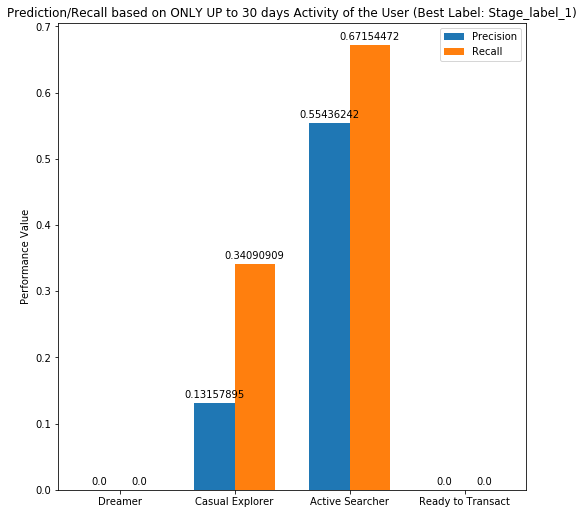

In [17]:
labels = ['Dreamer', 'Casual Explorer', 'Active Searcher', 'Ready to Transact']
pre = [0.0, 0.13157895, 0.55436242, 0.0]
rec = [0.0, 0.34090909, 0.67154472, 0.0]
sm_helper.show_buyer_stage_precision_recall(pre, rec, labels)

In [8]:
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/test/')

True

In [9]:
test_data_s3_path_q1 = sm_helper.load_test_data_on_s3('csvs/buyer_intent_test_set_q1_t030_t060_t090.csv','stage_label_1')

from time import gmtime, strftime, sleep
timestamp_suffix = strftime('%d-%H-%M-%S', gmtime()) 
sm_helper. inference_model(sm = sm_helper.sm, role = sm_helper.role, model_name = 'bi-stage-label1-17-' + timestamp_suffix, 
                       candidate_container = best_candidate_1['InferenceContainers'], 
                       transform_job_name = 'bi-l1-batch-trans-q1-t030-t060-t090-' + timestamp_suffix, 
                       input_data_on_s3 = test_data_s3_path_q1, 
                       output_bucket = sm_helper.bucket  , 
                       output_prefix =sm_helper.prefix, 
                       instance_type ='ml.m5.xlarge', instance_count = 1)

# Load Infered data from S3 to compute precision and recall
sm_helper.load_data_from_s3('s3://{}/{}/inference-results/{}'.format(sm_helper.bucket,sm_helper.prefix,'no_trg_buyer_intent_test_set_q1_t030_t060_t090.csv.out'), 'csvs/infered_label_1_t030_t060_t090.csv')

(cm_q1_t030_t060_t090, precision_q1_t030_t060_t090, recall_q1_t030_t060_t090) = sm_helper.compute_precision_recall('csvs/buyer_intent_test_set_q1_t030_t060_t090.csv', 'csvs/infered_label_1_t030_t060_t090.csv', 'stage_label_1' )

print('-----------------------------------------')
print('Confusion Matrix for First labeling ::')
print(cm_q1_t030_t060_t090)
print('Precision ::')
print(precision_q1_t030_t060_t090)
print('Recall ::')
print(recall_q1_t030_t060_t090)
print('-----------------------------------------')

Test data uploaded to: s3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/test/no_trg_buyer_intent_test_set_q1_t030_t060_t090.csv
candidate container is : [{'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-sklearn-automl:0.1.0-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-label1-21-04-00-10/data-processor-models/automl-bi--dpp0-1-591d3f719f574f7da5060e1cedd26d98cb7276df777e4/output/model.tar.gz', 'Environment': {'AUTOML_SPARSE_ENCODE_RECORDIO_PROTOBUF': '1', 'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/sagemaker_serve.py'}}, {'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-xgboost:0.90-1-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/au

/home/ec2-user/SageMaker/model_train_validate_deploy/ml_sagemaker_helper.py:282: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(cm) / np.sum(cm, axis = 0)


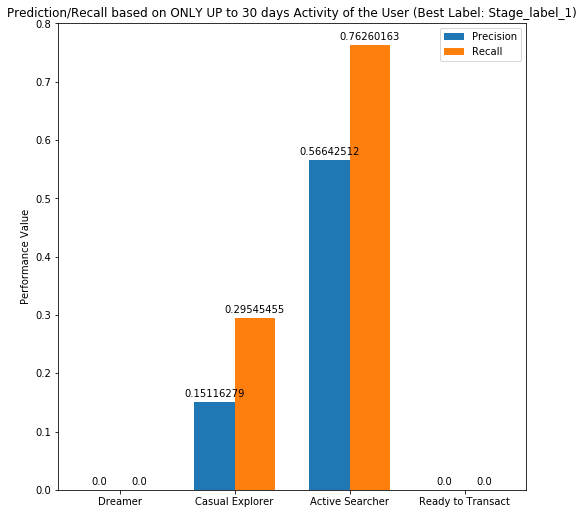

In [18]:
labels = ['Dreamer', 'Casual Explorer', 'Active Searcher', 'Ready to Transact']
pre = [0.0, 0.15116279, 0.56642512, 0.0]
rec = [0.0, 0.29545455, 0.76260163, 0.0]
sm_helper.show_buyer_stage_precision_recall(pre, rec, labels)

In [11]:
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/test/')

True

In [12]:
test_data_s3_path_q1 = sm_helper.load_test_data_on_s3('csvs/buyer_intent_test_set_q1_t060_t090.csv','stage_label_1')

from time import gmtime, strftime, sleep
timestamp_suffix = strftime('%d-%H-%M-%S', gmtime()) 
sm_helper. inference_model(sm = sm_helper.sm, role = sm_helper.role, model_name = 'bi-stage-label1-1730-' + timestamp_suffix, 
                       candidate_container = best_candidate_1['InferenceContainers'], 
                       transform_job_name = 'bi-l1-batch-trans-q1-t060-t090-' + timestamp_suffix, 
                       input_data_on_s3 = test_data_s3_path_q1, 
                       output_bucket = sm_helper.bucket  , 
                       output_prefix =sm_helper.prefix, 
                       instance_type ='ml.m5.xlarge', instance_count = 1)

# Load Infered data from S3 to compute precision and recall
sm_helper.load_data_from_s3('s3://{}/{}/inference-results/{}'.format(sm_helper.bucket,sm_helper.prefix,'no_trg_buyer_intent_test_set_q1_t060_t090.csv.out'), 
                  'csvs/infered_label_1_t060_t090.csv')

(cm_q1_t060_t090, precision_q1_t060_t090, recall_q1_t060_t090) = sm_helper.compute_precision_recall('csvs/buyer_intent_test_set_q1_t060_t090.csv', 'csvs/infered_label_1_t060_t090.csv', 'stage_label_1' )

print('-----------------------------------------')
print('Confusion Matrix for First labeling ::')
print(cm_q1_t060_t090)
print('Precision ::')
print(precision_q1_t060_t090)
print('Recall ::')
print(recall_q1_t060_t090)
print('-----------------------------------------')

Test data uploaded to: s3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/test/no_trg_buyer_intent_test_set_q1_t060_t090.csv
candidate container is : [{'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-sklearn-automl:0.1.0-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-label1-21-04-00-10/data-processor-models/automl-bi--dpp0-1-591d3f719f574f7da5060e1cedd26d98cb7276df777e4/output/model.tar.gz', 'Environment': {'AUTOML_SPARSE_ENCODE_RECORDIO_PROTOBUF': '1', 'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/sagemaker_serve.py'}}, {'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-xgboost:0.90-1-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-

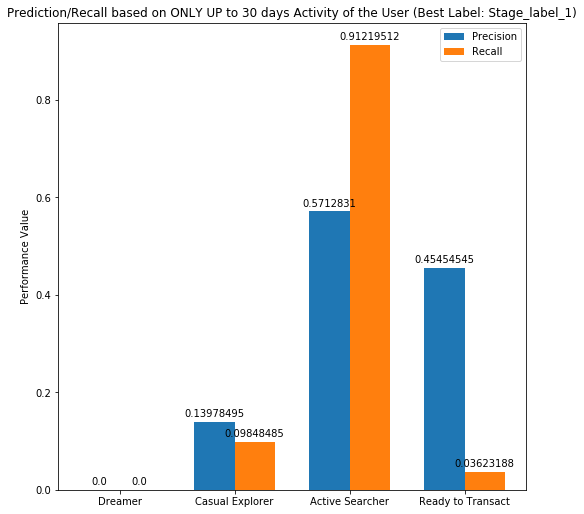

In [19]:
labels = ['Dreamer', 'Casual Explorer', 'Active Searcher', 'Ready to Transact']
pre = [0.0, 0.13978495, 0.5712831, 0.45454545]
rec = [0.0, 0.09848485, 0.91219512, 0.03623188]
sm_helper.show_buyer_stage_precision_recall(pre, rec, labels)

In [14]:
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/test/')
test_data_s3_path_q1 = sm_helper.load_test_data_on_s3('csvs/buyer_intent_test_set_q1_t090.csv','stage_label_1')

from time import gmtime, strftime, sleep
timestamp_suffix = strftime('%d-%H-%M-%S', gmtime()) 
sm_helper. inference_model(sm = sm_helper.sm, role = sm_helper.role, model_name = 'bi-stage-label1-173060-' + timestamp_suffix, 
                       candidate_container = best_candidate_1['InferenceContainers'], 
                       transform_job_name = 'bi-l1-batch-trans-q1-t090-' + timestamp_suffix, 
                       input_data_on_s3 = test_data_s3_path_q1, 
                       output_bucket = sm_helper.bucket  , 
                       output_prefix =sm_helper.prefix, 
                       instance_type ='ml.m5.xlarge', instance_count = 1)

# Load Infered data from S3 to compute precision and recall
sm_helper.load_data_from_s3('s3://{}/{}/inference-results/{}'.format(sm_helper.bucket,sm_helper.prefix,'no_trg_buyer_intent_test_set_q1_t090.csv.out'), 
                  'csvs/infered_label_1_t090.csv')

(cm_q1_t090, precision_q1_t090, recall_q1_t090) = sm_helper.compute_precision_recall('csvs/buyer_intent_test_set_q1_t090.csv', 'csvs/infered_label_1_t090.csv', 'stage_label_1' )

print('-----------------------------------------')
print('Confusion Matrix for First labeling ::')
print(cm_q1_t090)
print('Precision ::')
print(precision_q1_t090)
print('Recall ::')
print(recall_q1_t090)
print('-----------------------------------------')

Test data uploaded to: s3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/test/no_trg_buyer_intent_test_set_q1_t090.csv
candidate container is : [{'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-sklearn-automl:0.1.0-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-label1-21-04-00-10/data-processor-models/automl-bi--dpp0-1-591d3f719f574f7da5060e1cedd26d98cb7276df777e4/output/model.tar.gz', 'Environment': {'AUTOML_SPARSE_ENCODE_RECORDIO_PROTOBUF': '1', 'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/sagemaker_serve.py'}}, {'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-xgboost:0.90-1-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-la

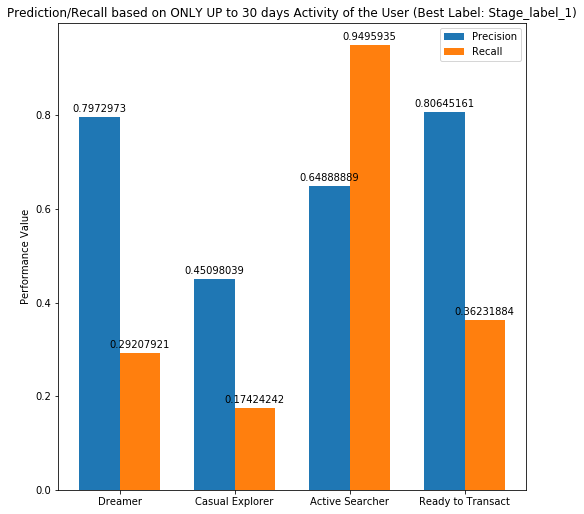

In [20]:
labels = ['Dreamer', 'Casual Explorer', 'Active Searcher', 'Ready to Transact']
pre = [0.7972973, 0.45098039, 0.64888889, 0.80645161]
rec = [0.29207921, 0.17424242, 0.9495935, 0.36231884]
sm_helper.show_buyer_stage_precision_recall(pre, rec, labels)

In [23]:
sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/test/')
test_data_s3_path_q1 = sm_helper.load_test_data_on_s3('csvs/buyer_intent_test_set_q1.csv','stage_label_1')

from time import gmtime, strftime, sleep
timestamp_suffix = strftime('%d-%H-%M-%S', gmtime()) 
sm_helper. inference_model(sm = sm_helper.sm, role = sm_helper.role, model_name = 'bi-stage-label1-173060-' + timestamp_suffix, 
                       candidate_container = best_candidate_1['InferenceContainers'], 
                       transform_job_name = 'bi-l1-batch-trans-q1-' + timestamp_suffix, 
                       input_data_on_s3 = test_data_s3_path_q1, 
                       output_bucket = sm_helper.bucket  , 
                       output_prefix =sm_helper.prefix, 
                       instance_type ='ml.m5.xlarge', instance_count = 1)

# Load Infered data from S3 to compute precision and recall
sm_helper.load_data_from_s3('s3://{}/{}/inference-results/{}'.format(sm_helper.bucket,sm_helper.prefix,'no_trg_buyer_intent_test_set_q1.csv.out'), 
                  'csvs/infered_label_1.csv')

(cm_q1, precision_q1, recall_q1) = sm_helper.compute_precision_recall('csvs/buyer_intent_test_set_q1.csv', 'csvs/infered_label_1.csv', 'stage_label_1' )

print('-----------------------------------------')
print('Confusion Matrix for First labeling ::')
print(cm_q1)
print('Precision ::')
print(precision_q1)
print('Recall ::')
print(recall_q1)
print('-----------------------------------------')

Test data uploaded to: s3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/test/no_trg_buyer_intent_test_set_q1.csv
candidate container is : [{'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-sklearn-automl:0.1.0-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-label1-21-04-00-10/data-processor-models/automl-bi--dpp0-1-591d3f719f574f7da5060e1cedd26d98cb7276df777e4/output/model.tar.gz', 'Environment': {'AUTOML_SPARSE_ENCODE_RECORDIO_PROTOBUF': '1', 'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/sagemaker_serve.py'}}, {'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-xgboost:0.90-1-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-label1-

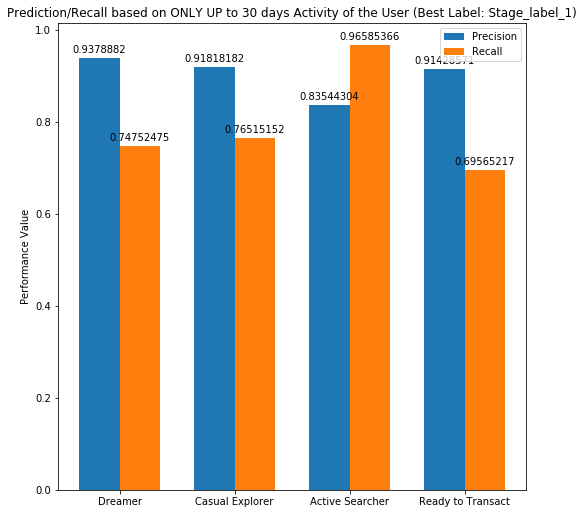

In [25]:
labels = ['Dreamer', 'Casual Explorer', 'Active Searcher', 'Ready to Transact']
pre = [0.9378882, 0.91818182, 0.83544304, 0.91428571]
rec = [0.74752475, 0.76515152, 0.96585366, 0.69565217]
sm_helper.show_buyer_stage_precision_recall(pre, rec, labels)

In [3]:
import pickle
best_candidate_1 = pickle.load(open('best_candidate_buyer_stage.bi', 'rb'))

sm_helper.s3_clean_up(bucket = 'datascience-workspace-dev', prefix='buyer-intent/ml-sagemaker/autml-buyer-intent/inference-results/')

# Checking the scalability on Real-size daily data
test_data_s3_path = 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/real-size-data/'
from time import gmtime, strftime, sleep
timestamp_suffix = strftime('%d-%H-%M-%S', gmtime()) 
sm_helper.inference_model(sm = sm_helper.sm, role = sm_helper.role, model_name = 'bi-stage-' + timestamp_suffix, 
                       candidate_container = best_candidate_1['InferenceContainers'], 
                       transform_job_name = 'bi-l1-batch-trans-real-size-' + timestamp_suffix, 
                       input_data_on_s3 = test_data_s3_path, 
                       output_bucket = sm_helper.bucket  , 
                       output_prefix =sm_helper.prefix, 
                       instance_type ='ml.m4.xlarge', instance_count = 3)

candidate container is : [{'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-sklearn-automl:0.1.0-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-label1-21-04-00-10/data-processor-models/automl-bi--dpp0-1-591d3f719f574f7da5060e1cedd26d98cb7276df777e4/output/model.tar.gz', 'Environment': {'AUTOML_SPARSE_ENCODE_RECORDIO_PROTOBUF': '1', 'AUTOML_TRANSFORM_MODE': 'feature-transform', 'SAGEMAKER_DEFAULT_INVOCATIONS_ACCEPT': 'application/x-recordio-protobuf', 'SAGEMAKER_PROGRAM': 'sagemaker_serve', 'SAGEMAKER_SUBMIT_DIRECTORY': '/opt/ml/model/sagemaker_serve.py'}}, {'Image': '246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-xgboost:0.90-1-cpu-py3', 'ModelDataUrl': 's3://datascience-workspace-dev/buyer-intent/ml-sagemaker/autml-buyer-intent/output/automl-bi-label1-21-04-00-10/tuning/automl-bi--dpp0-xgb/tuning-job-1-af61c16c8faa46ffbb-242-eefdc953/output/model.tar.gz', 'Environment': {'MAX_CONTENT_LENGT